In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset 
data=pd.read_csv('/kaggle/input/advertising-data/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# Determines number of columns and rows in the dataset
data.shape

(200, 4)

In [5]:
# Shows the details about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Calculates mean, minimum, maximum, standard deviation of each column in dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [7]:
# Checks total number of null values present in each column
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

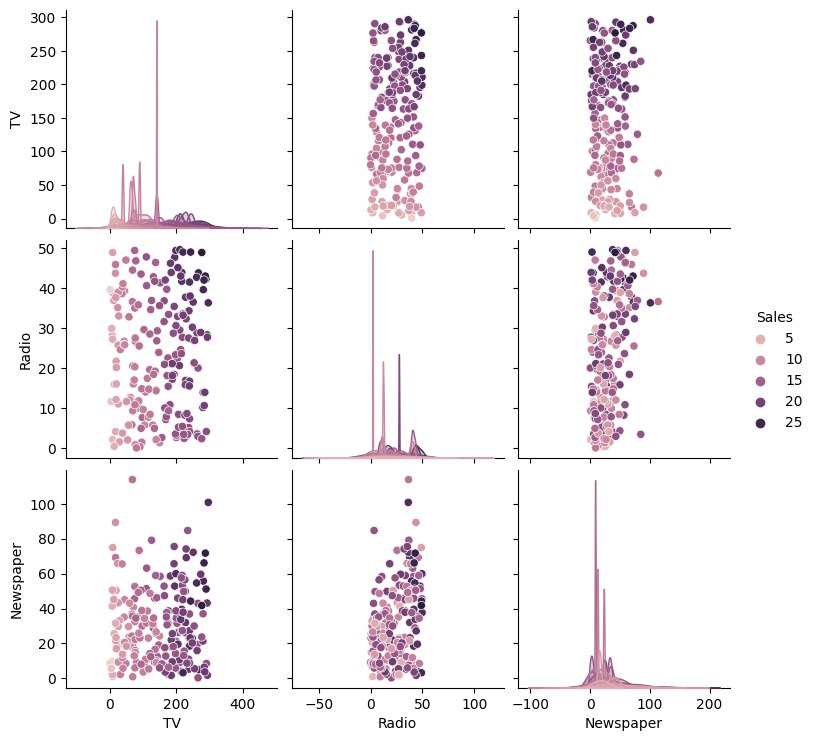

In [8]:
sns.pairplot(hue = 'Sales', data = data)

In [7]:
# Precentage of null values present in the each column
data.isnull().sum()/data.shape[0]*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [9]:
# Splitting features and targets from dataset
x=data.drop(['Sales'],axis=1)
y=data['Sales']

In [28]:
# Splitting the data into training and testing datas
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [29]:
# Creating a model
model=LinearRegression()

In [30]:
#Fitting the Data into the model
model.fit(x_train,y_train)

LinearRegression()

In [31]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[25.47370542 10.81698104 16.74737721 26.00853776 12.8625552  22.26315234
  9.52305334 16.37869609  9.95017099 21.60995651 19.46778618 12.67071783
 18.5934919  13.93937746 16.18287072  5.74859806  9.18511777 13.76003304
 13.11237586 17.74390704 10.99847796 21.19722869  9.2968015   7.87790005
 12.51522738 16.78884059 16.55012889 13.78209541 15.28950066 18.92476522
  7.8635404  18.38590541 20.17098401 21.9746129  12.16124189  6.84742547
 19.72252875 20.7865547  14.77716329 21.55061506]


In [32]:
# Calculating the acuuracy of the training data
training_accuracy=r2_score(y_train,x_train_prediction)
print(training_accuracy)

0.8897402599573553


In [33]:
x_test_predict=model.predict(x_test)
print(x_test_predict)

[17.32102034 20.76952621 24.42176613  8.84760332 21.54945944 12.49128592
 21.23492319  8.18546594 17.38225926 16.77724474  8.11034878  8.15491482
 19.24863853  7.21748548 12.62522911 15.11592505  7.6700891  17.89162832
 10.74199495 20.577452   21.60520451 13.21114237 10.17938417 23.23592891
  8.78940044  7.50179876 21.06075696 13.55858684 10.50179864  7.01147759
 16.11334896 10.17527754 21.25486097 10.5296208  22.2027978  21.19572103
 11.38066332 23.62407471 12.20803364  5.9308635  11.7407816  15.19457127
  9.52538593  9.00079267 17.41864772  6.65006963 10.18162528 15.0876162
 11.06150239 11.23646056 13.52999934 14.58034271 10.32479399  8.90195866
  8.61731957 12.46181092  9.99208562 25.7301328   7.21442018 15.82525446
 21.59678369 17.05048096 12.75657391  9.71412941 21.37069835  6.88826465
 23.7350999   6.48450974 12.3147778   9.2852988  10.69871264  8.67098914
 17.03034904 18.06842951 16.06425854 18.27338829 15.25221612 18.95718165
 18.06318554 22.05076698 10.43702961 13.88995818 10.

In [34]:
# Calculating the acuuracy of the testing data
test_accuracy=r2_score(y_test,x_test_predict)
print(test_accuracy)

0.895132063806193
